In [1]:
import math
import sys
import operator
import networkx as nx
#import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance
import scipy.signal
import skimage
import skimage.io
from skimage.segmentation import slic
from skimage.util import img_as_float
from scipy.optimize import minimize

import pdb

In [2]:
def get_saliency_ft(img_path):

# Saliency map calculation based on:

  img = skimage.io.imread(img_path)

  img_rgb = img_as_float(img)

  img_lab = skimage.color.rgb2lab(img_rgb) 
  avgl,avga,avgb = np.mean(img_lab,axis=(0,1))

  mean_val = np.mean(img_lab,axis=(0,1))
  kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
 # kernel_h = (1.0/4.0) * np.array([[1,2,1]])
  kernel_w = kernel_h.transpose()

  blurred_l = scipy.signal.convolve2d(img_lab[:,:,0],kernel_h,mode='same')
  blurred_a = scipy.signal.convolve2d(img_lab[:,:,1],kernel_h,mode='same')
  blurred_b = scipy.signal.convolve2d(img_lab[:,:,2],kernel_h,mode='same')

  blurred_l2 = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
  blurred_a2 = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
  blurred_b2 = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

  im_blurred = np.dstack([blurred_l2,blurred_a2,blurred_b2])

 # sal = np.linalg.norm(mean_val - im_blurred,axis = 2)
  sal=np.square(blurred_l2-avgl) + np.square(blurred_a2-avga) + np.square(blurred_b2-avgb)
  sal_max = np.max(sal)
  sal_min = np.min(sal)
  range = sal_max - sal_min
  if range==0:
    range = 1
  sal = 255 * ((sal - sal_min) / range)
 
  sal=sal.astype(int)
  return sal




In [3]:
def binarise_saliency_map(saliency_map):
 
  adaptive_threshold = 2.0 * saliency_map.mean()
  return (saliency_map > adaptive_threshold)

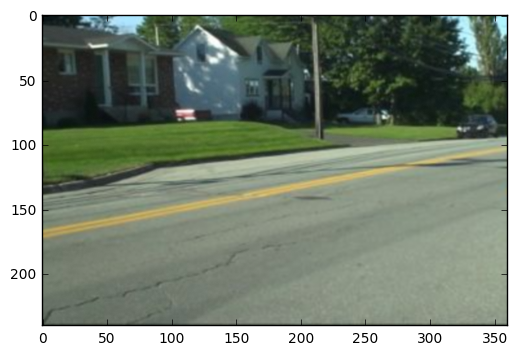

In [4]:
import cv2
from cv2.cv import *
filename = '/home/super/Desktop/Dataset/ChangeDetection/dataset/shadow/bungalows/input/in000300.jpg'

# get the saliency maps using the 3 implemented methods
ft = get_saliency_ft(filename)
# often, it is desirable to have a binary saliency map
binary_sal = binarise_saliency_map(ft)

srcBGR = cv2.imread(filename)

img = cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

#cv2.imshow('img',img)
#cv2.imshow('ft',ft)

#openCV cannot display numpy type 0, so convert to uint8 and scale
#cv2.imshow('binary',255 * binary_sal.astype('uint8'))



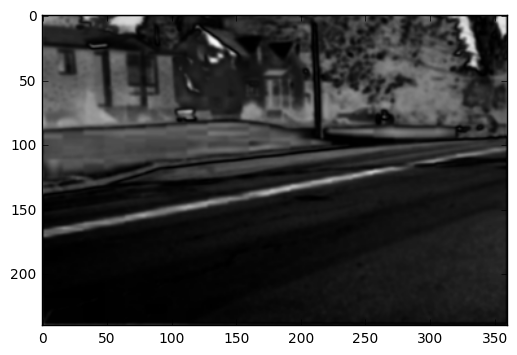

40.910625000000003

In [5]:
#trb = skimage.color.lab2rgb(ft) 
#plt.imshow(ft, cmap = 'gray', interpolation = 'bicubic')
plt.imshow(ft, cmap = 'gray')
plt.show()

ft_mean=ft.mean()
ft_mean.min()

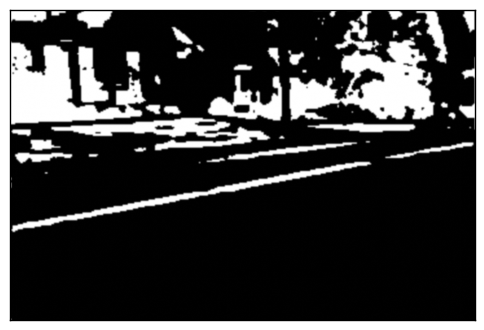

In [6]:
plt.imshow(binary_sal, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()




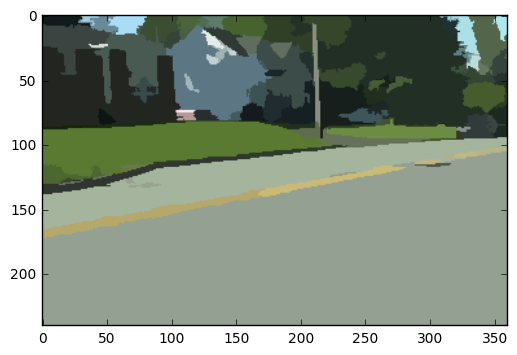

In [7]:
import cv2
import pymeanshift as pms


(segmented_image, labels_image, number_regions) = pms.segment(img, spatial_radius=7, 
                                                              range_radius=10, min_density=20)

plt.imshow(segmented_image)
plt.show()

In [8]:
z=labels_image.max()
z

110

In [9]:

segmented_image.max()
x,y,z=img.shape
bin_img=np.zeros((x,y,z))
bin_img.shape

(240, 360, 3)

In [10]:


for k in range(z+1):
  #ft_play=np.copy(ft)  
  ft_seg=np.copy(segmented_image)
  ft_seg[np.where(labels_image!=k)]=0
  ft_seg[np.where(ft_seg!=0)]=1
  #zp=ft_seg.nonzero()
  #unzipped = zip(*zp)
  #divi=len(unzipped)
  seg_orig=np.multiply(ft_seg[:,:,0],ft)
  seg_mean=np.sum(seg_orig)/np.count_nonzero(seg_orig)
  if seg_mean>2*ft_meann:
    bin_img[np.where(ft_seg!=0)]=1
    
  

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in long_scalars


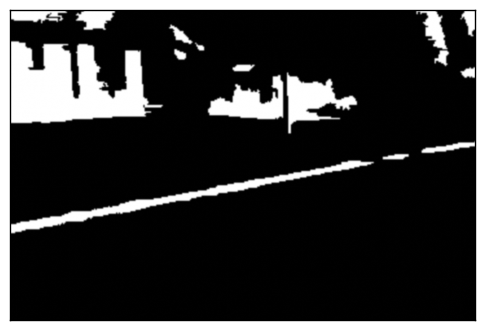

In [11]:
plt.imshow(bin_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img2 = skimage.io.imread('/home/super/Downloads/0_2_2276.jpg')

img2[:,:,0]
img_rgb = img_as_float(img2)
img_lab = skimage.color.rgb2lab(img2) 
img_lab[0:9,0:9,2]



  
avgl,avga,avgb = np.mean(img_lab,axis=(0,1))
mean_val = np.mean(img_lab,axis=(0,1))
kernel_h = (1.0/16.0) * np.array([[1,4,6,4,1]])
 # kernel_h = (1.0/4.0) * np.array([[1,2,1]])
kernel_w = kernel_h.transpose()

blurred_l = scipy.signal.convolve2d(img_lab[:,:,0],kernel_h,mode='same')
blurred_a = scipy.signal.convolve2d(img_lab[:,:,1],kernel_h,mode='same')
blurred_b = scipy.signal.convolve2d(img_lab[:,:,2],kernel_h,mode='same')

blurred_l2 = scipy.signal.convolve2d(blurred_l,kernel_w,mode='same')
blurred_a2 = scipy.signal.convolve2d(blurred_a,kernel_w,mode='same')
blurred_b2 = scipy.signal.convolve2d(blurred_b,kernel_w,mode='same')

im_blurred = np.dstack([blurred_l2,blurred_a2,blurred_b2])

 # sal = np.linalg.norm(mean_val - im_blurred,axis = 2)
sal=np.square(blurred_l2-avgl) + np.square(blurred_a2-avga) + np.square(blurred_b2-avgb)
sal_max = np.max(sal)
sal_min = np.min(sal)
range = sal_max - sal_min
if range==0:
  range = 1
sal = 255 * ((sal - sal_min) / range)
sal=sal.astype(int)
sal[:,:]




In [15]:
filename = '/home/super/Desktop/Dataset/ChangeDetection/dataset/shadow/bungalows/input/in000300.jpg'
ft = get_saliency_ft(filename)
img = skimage.io.imread(filename)
(segmented_image, labels_image, number_regions) = pms.segment(img, spatial_radius=7, 
                                                                range_radius=10, min_density=20)
ft_mean=ft.mean()
x,y=ft.shape
bin_img=np.zeros((x,y))
for k in range(labels_image.max()+1):
  ft_seg=np.copy(segmented_image)
  ft_seg[np.where(labels_image!=k)]=0
  ft_seg[np.where(ft_seg!=0)]=1
  seg_orig=np.multiply(ft_seg[:,:,0],ft)
  seg_mean=np.sum(seg_orig)/np.count_nonzero(seg_orig)
  if seg_mean>2*ft_mean:
    bin_img[np.where(seg_orig!=0)]=255
    
    
 # cv2.imwrite(binaryPath+binpath,bin_img)
      



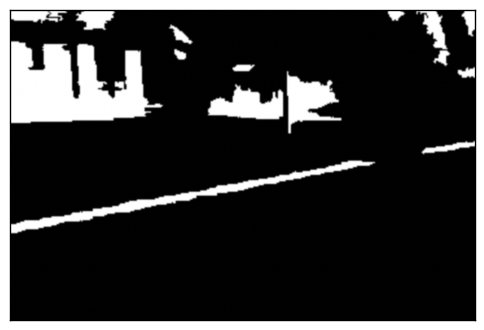

In [16]:
plt.imshow(bin_img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [17]:
cv2.imwrite('/home/super/Desktop/test.jpg',bin_img)

True